In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
emp = pd.read_csv('./data/unemployment(natl_avg).csv')

In [31]:
emp = emp.drop(columns=['2019'])

In [32]:
emp = emp.dropna(thresh=2)
emp.head(20)

,Country Name,2015,2016,2017,2018
1,Afghanistan,NaN,NaN,11.183600,NaN
3,Albania,17.0800,NaN,13.750000,NaN
5,Arab World,NaN,9.559937,NaN,NaN
6,United Arab Emirates,NaN,1.635502,2.463000,2.2290
7,Argentina,NaN,NaN,8.347400,9.2205
11,Australia,6.0542,5.709900,5.591100,5.2984
12,Austria,5.7227,6.013800,5.499000,4.8480
13,Azerbaijan,4.9600,5.000000,5.000000,4.9000
15,Belgium,8.4820,7.829700,7.086200,5.9482
18,Bangladesh,NaN,4.350000,4.372300,NaN


In [33]:
emp['average'] = emp.iloc[:, 1:].astype(float).mean(axis=1)

In [34]:
emp = emp.rename(columns={'Country Name' : 'Country'})

In [35]:
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

In [36]:
emp_whr15 = emp.merge(whr15, on='Country', how='inner')

In [37]:
emp_whr15 = emp_whr15.sort_values('average')
emp_whr15.head(1)

,Country,2015,2016,2017,2018,average,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
83,Qatar,0.17,0.15,0.14,0.11,0.1425,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.6404,0.52208,0.32573,1.55674


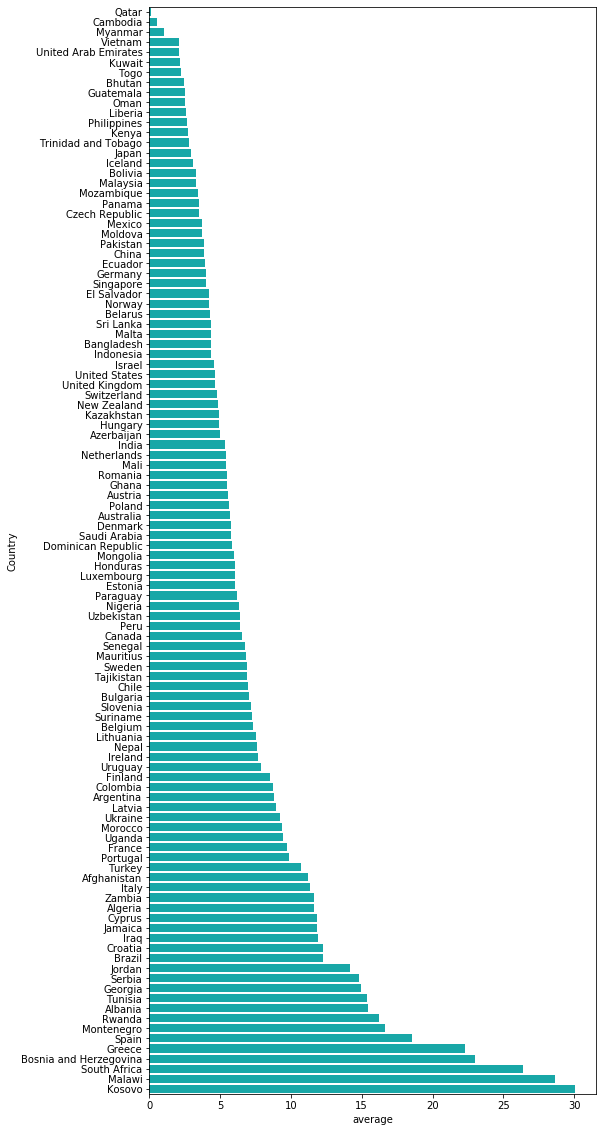

In [38]:
plt.figure(figsize=(8, 20))
sns.barplot(data=emp_whr15, y='Country', x='average', orient='h', color='c')

In [39]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 
'Australia', 'Sweden', 'Austria')

emp_top = emp.loc[emp['Country'].isin(top_countries)]
emp_top = emp_top.sort_values('average')

In [40]:
emp_whr15.average.mean()

7.5362558214321

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

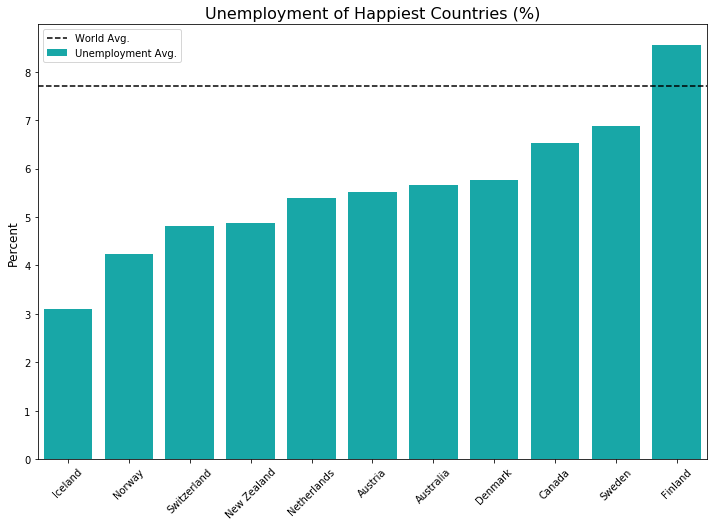

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(data=emp_top, x='Country', y='average', color='c', label='Unemployment Avg.')
plt.axhline(y=7.7, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Unemployment of Happiest Countries (%)', fontsize=16)
plt.legend()
plt.xticks(rotation=45)

In [42]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

emp_bottom = emp.loc[emp['Country'].isin(bottom_countries)]

In [43]:
emp_bottom= emp_bottom.sort_values('average')

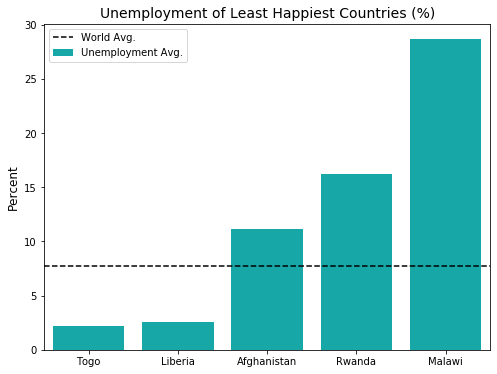

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(data=emp_bottom, x='Country', y='average', color='c', label='Unemployment Avg.')
plt.axhline(y=7.7, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Unemployment of Least Happiest Countries (%)', fontsize=14)
plt.legend()


### Unemployment by regions only

In [45]:
emp_reg = pd.read_csv('./data/unemployment_regions.csv')

In [46]:
emp_reg

,Country Name,2015,2016,2017,2018
0,Arab World,NaN,9.559937,NaN,NaN
1,Central Europe and the Baltics,7.817370,6.489368,5.294665,4.314645
2,East Asia & Pacific,NaN,NaN,3.709730,3.609409
3,Europe & Central Asia,8.476674,8.040351,7.453598,7.012587
4,Latin America & Caribbean,NaN,8.325580,8.731762,8.425730
5,Middle East & North Africa,10.509777,10.011482,10.630924,NaN
6,North America,5.457306,5.100956,4.571674,4.108014
7,South Asia (IDA & IBRD),NaN,NaN,NaN,5.173809


In [47]:
emp_reg['average'] = emp_reg.iloc[:, 1:].astype(float).mean(axis=1)

In [48]:
emp_reg = emp_reg.rename(columns={'Country Name' : 'Country'})

Text(0.5, 1.0, 'Unemployment by Region (%)')

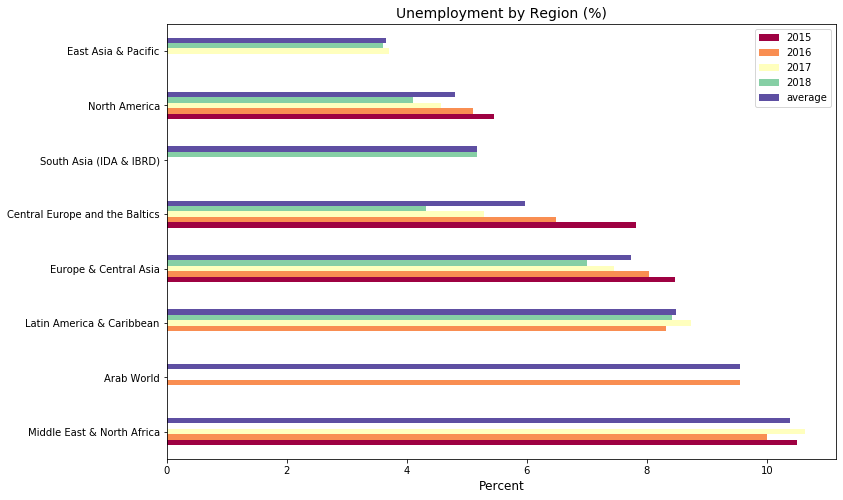

In [49]:
emp_reg.sort_values('average', ascending=False).plot(kind='barh', x='Country', figsize=(12,8), colormap='Spectral')
plt.ylabel('')
plt.xlabel('Percent', fontsize=12)
plt.title('Unemployment by Region (%)', fontsize=14)

In [50]:
emp_whr15['unemployment_rank'] = emp_whr15.average.rank().astype(int)

In [51]:
emp_whr15

,Country,2015,2016,2017,2018,average,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,unemployment_rank
83,Qatar,0.170000,0.150000,0.140000,0.110000,0.142500,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674,1
51,Cambodia,0.393100,0.716200,NaN,NaN,0.554650,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195,2
63,Myanmar,0.765900,NaN,1.556100,0.865900,1.062633,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805,3
104,Vietnam,2.124600,2.083400,2.053500,1.995600,2.064275,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173,4
2,United Arab Emirates,NaN,1.635502,2.463000,2.229000,2.109167,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743,5
52,Kuwait,2.200000,2.160000,NaN,NaN,2.180000,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634,6
94,Togo,2.203900,NaN,NaN,NaN,2.203900,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,7
14,Bhutan,2.450000,NaN,NaN,NaN,2.450000,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794,8
35,Guatemala,2.506200,2.583000,2.462000,NaN,2.517067,Latin America and Caribbean,43,6.123,0.05224,0.74553,1.04356,0.64425,0.57733,0.09472,0.27489,2.74255,9
75,Oman,NaN,3.270000,NaN,1.800000,2.535000,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489,10


Text(0, 0.5, 'Unemployment Rank')

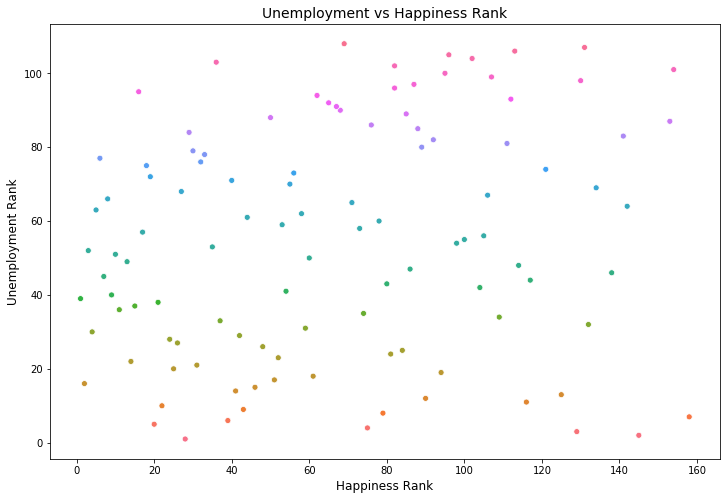

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=emp_whr15, x='Happiness Rank', y='unemployment_rank', hue='Country', legend=False)
plt.title('Unemployment vs Happiness Rank', fontsize=14)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Unemployment Rank', fontsize=12)

In [53]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [54]:
data = dict(type = 'choropleth', 
           locations = emp_whr15['Country'],
           locationmode = 'country names',
           z = emp_whr15['average'], 
           text = emp_whr15['Country'],
           colorbar = {'title':'Percent'},
           colorscale = "Spectral",
           reversescale = True)
layout = dict(title = 'Unemployment (national est.)', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
